<a href="https://colab.research.google.com/github/wonwookim/DataMining/blob/main/dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

boston = pd.read_csv('/content/drive/MyDrive/data_mining/BostonHousing.csv')
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0


In [2]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [4]:
corr = boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


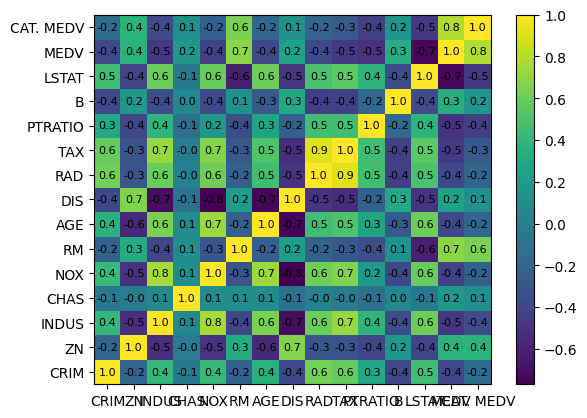

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.pcolor(corr)
plt.xticks(np.arange(0.5, len(corr.columns), 1),corr.columns)
plt.yticks(np.arange(0.5, len(corr.index), 1),corr.index)
plt.colorbar()
for i in range(len(corr.index)):
  for j in range(len(corr.columns)):
    plt.text(j + 0.5, i + 0.5, '{:.1f}'.format(corr.iloc[j,i]), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 8)
## 여기서 너무 높은 상관관계를 갖는 몇몇 애들은 지울 필요가 있음음

In [19]:
boston.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [21]:
boston['RM_bin'] = pd.cut(boston.RM, range(0,10), labels = False)

In [22]:
boston['RM_bin']

0      6
1      6
2      7
3      6
4      7
      ..
501    6
502    6
503    6
504    6
505    6
Name: RM_bin, Length: 506, dtype: int64

In [30]:
boston.groupby(['RM_bin','CHAS'])['MEDV'].mean() # RM_bin과 CHAS 값을 두고 MEDV를 보겠다라는 의미 즉 RM_bin과 CHAS 동시에 비교 하는 것
# 여기서 값을 보면 CHAS에서 0은 모든 rm_bin 값에서 분포하지만 1 값은 그렇지 못해서 정확한 분석하기 어렵다.

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

##Cross Tab

In [32]:
boston_new = boston.rename(columns = {'CAT. MEDV' : 'CAT_MEDV'})

tb1 = pd.crosstab(boston_new.CAT_MEDV, boston_new.ZN) #ZN에 따른 CAT_MEDV 값의 개수를 보여줌
tb1# 결과를 보았을 때 CAT_MEDV는 Binrary 값을 갖는다를 알 수 있다

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,339,10,0,1,5,4,9,10,3,6,...,2,3,3,1,10,1,2,0,0,0
1,33,0,1,0,16,0,1,0,0,0,...,1,1,0,2,5,1,0,5,4,1


In [34]:
tb1.sum() #ZN의 값에 따른 CAT_MEDV 총 개수

ZN
0.0      372
12.5      10
17.5       1
18.0       1
20.0      21
21.0       4
22.0      10
25.0      10
28.0       3
30.0       6
33.0       4
34.0       3
35.0       3
40.0       7
45.0       6
52.5       3
55.0       3
60.0       4
70.0       3
75.0       3
80.0      15
82.5       2
85.0       2
90.0       5
95.0       4
100.0      1
dtype: int64

In [33]:
proptb1 = tb1/ tb1.sum()

In [36]:
proptb1

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91129,1.0,0.0,1.0,0.238095,1.0,0.9,1.0,1.0,1.0,...,0.666667,0.75,1.0,0.333333,0.666667,0.5,1.0,0.0,0.0,0.0
1,0.08871,0.0,1.0,0.0,0.761905,0.0,0.1,0.0,0.0,0.0,...,0.333333,0.25,0.0,0.666667,0.333333,0.5,0.0,1.0,1.0,1.0


<Axes: xlabel='ZN'>

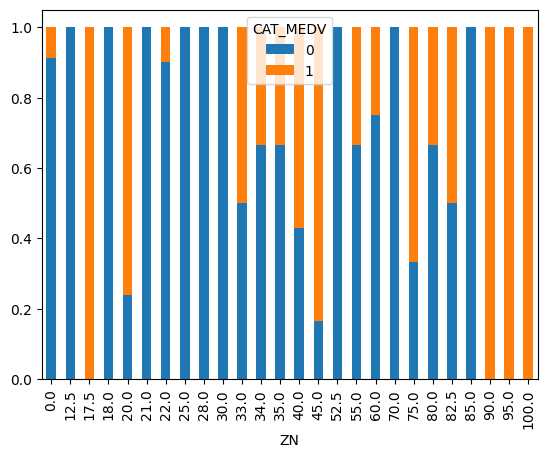

In [38]:
(proptb1.transpose()).plot(kind = 'bar', stacked = True)
##해당 그래프를 보았을 때 zn 값을 0~100까지가 아닌 3개의 타입으로 변경 가능
# 1.CAT_MEDV = 0인 ZN
# 2.CAT_MEDV = 1인 ZN
# 3.섞인 ZN
# 즉 level을 줄일 수 있다는거 합쳐서

## Using Techniques

In [40]:
from sklearn.decomposition import PCA
cereal = pd.read_csv('/content/drive/MyDrive/data_mining/cereal.csv')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [42]:
corr = cereal.corr()
corr

<ipython-input-42-849f2726ebc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cereal.corr()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


In [43]:
cereal.var()

<ipython-input-43-a058f1489ba8>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cereal.var()


calories     379.630895
protein        1.198565
fat            1.012987
sodium      7027.853725
fiber          5.680424
carbo         18.309467
sugars        19.757006
potass      5081.809638
vitamins     499.188312
shelf          0.693096
weight         0.022643
cups           0.054157
rating       197.326321
dtype: float64

In [49]:
import numpy as np
pca = PCA(n_components = 2) #주성분 개수 설정
pca.fit(cereal[['calories', 'rating']])
pca_summary = pd.DataFrame({'Standard deviation' : np.sqrt(pca.explained_variance_), #각각의 주성분 별 얼마나 분산을 가지는지 보여줌 근데 분산이 커서 표준편차로 보여줌
                           'Proportion of variance' : pca.explained_variance_ratio_, #각 주성분이 이전 변수들을 얼마나 대표할 수 있는지지
                           'Cumulative proportion' : np.cumsum(pca.explained_variance_ratio_)})
pca_summary.index = ['PC1', 'PC2']
pca_summary = pca_summary.transpose()
pca_summary

,PC1,PC2
Standard deviation,22.316462,8.884410
Proportion of variance,0.863191,0.136809
Cumulative proportion,0.863191,1.000000


In [50]:
pca.components_ ## 이 결과값은 정확히 말하자면 주성분의 벡터 방향
# 두개의 벡터 방향을 곱하면 수직이기 때문에 0이 나옴

array([[-0.84705348,  0.53150766],
       [ 0.53150766,  0.84705348]])

In [64]:
pca = PCA()
pca.fit(cereal.iloc[:, 3:].dropna(axis = 0))
pca_summary = pd.DataFrame({'Standard deviation' : np.sqrt(pca.explained_variance_), #각각의 주성분 별 얼마나 분산을 가지는지 보여줌 근데 분산이 커서 표준편차로 보여줌
                           'Proportion of variance' : pca.explained_variance_ratio_, #각 주성분이 이전 변수들을 얼마나 대표할 수 있는지지
                           'Cumulative proportion' : np.cumsum(pca.explained_variance_ratio_)})
pca_summary.index = ['PC{}'.format(i) for i in range(1, len(pca_summary.index) + 1)]
pca_summary = pca_summary.transpose()
pca_summary 
## 결과를 봤을 때 PC1, PC2 두개가 전체 데이터의 90프로 이상 설명하기 때문에
## PC!, PC2만 이용한다.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,84.828860,71.372104,22.378690,18.865535,8.629310,2.375804,2.085015,0.805514,0.694930,0.532227,0.184444,6.683777e-02,5.259696e-08
Proportion of variance,0.543806,0.384958,0.037847,0.026896,0.005627,0.000427,0.000329,0.000049,0.000036,0.000021,0.000003,3.375988e-07,2.090635e-19
Cumulative proportion,0.543806,0.928765,0.966611,0.993508,0.999135,0.999562,0.999890,0.999939,0.999976,0.999997,1.000000,1.000000e+00,1.000000e+00


In [72]:
pca_component = pd.DataFrame(pca.components_.transpose(), columns = pca_summary.columns, index = cereal.iloc[:,3:].columns)

In [73]:
pca_component 
#pc1에서는 sodium 값이 매우 큼 -> sodium의 분산을 보면 아주 큰 것을 알 수 있음
# 즉 sodium이 PC1에 지배적인 역할을 함
# 골고루 영향을 받기 위해 스케일링 작업을 실시시

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
calories,0.076192,-0.010006,0.611914,-0.612823,0.464050,0.131450,0.082059,-0.011293,-0.029713,0.043633,0.004568,0.007415,4.193592e-02
protein,-0.001398,0.008333,-0.000356,0.001783,0.055719,0.228648,0.041511,0.467878,0.532673,-0.243116,-0.032144,-0.014506,-6.162939e-01
fat,-0.000118,0.002595,0.015763,-0.025982,-0.016691,0.174345,-0.181299,-0.309421,0.198180,-0.835130,-0.016423,-0.037077,3.184690e-01
sodium,0.983021,0.112178,-0.141872,-0.003522,0.015170,0.014092,0.019893,-0.000123,0.003942,0.000839,0.000305,0.000251,1.026023e-02
fiber,-0.004606,0.029856,-0.019346,0.020273,0.017485,0.090922,0.259027,-0.577271,-0.376825,-0.161810,0.029006,-0.001096,-6.483602e-01
carbo,0.019617,-0.017911,0.015379,0.031108,0.348461,-0.834993,-0.323977,-0.022461,0.050576,-0.169255,-0.021517,-0.002754,-2.056936e-01
sugars,0.006250,0.001528,0.100421,-0.112461,-0.287017,-0.419688,0.796458,0.052303,0.180832,-0.173850,-0.007511,0.004372,1.364878e-01
potass,-0.107276,0.990512,0.028274,-0.043969,-0.041434,-0.028964,-0.042077,0.015654,0.000719,0.005680,0.000202,0.000863,6.400483e-03
vitamins,0.101106,0.022197,0.702645,0.702849,-0.024220,0.024395,0.012349,0.006334,-0.008214,-0.006274,-0.001630,0.000775,9.642514e-03
shelf,-0.000893,0.004086,0.012203,0.005840,-0.004883,-0.008075,-0.042105,-0.585837,0.704389,0.390828,0.075506,-0.010983,7.005538e-09


In [74]:
from sklearn import preprocessing
pca = PCA()
pca.fit(preprocessing.scale(cereal.iloc[:,3:].dropna(axis = 0)))
pca_summary = pd.DataFrame({'Standard deviation' : np.sqrt(pca.explained_variance_), 
                           'Proportion of variance' : pca.explained_variance_ratio_, 
                           'Cumulative proportion' : np.cumsum(pca.explained_variance_ratio_)})
pca_summary = pca_summary.transpose()
pca_summary.columns = ['PC{}'.format(i) for i in range(1, len(pca_summary.columns) + 1)]
pca_summary.round(4)
## 스케일 작업이 이루어졌을 때 PC5까지 가야 81.5퍼센트 정도 입증 가능

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9124,1.7832,1.3567,1.0374,0.9919,0.8536,0.8247,0.6751,0.5544,0.3639,0.2721,0.2345,0.0
Proportion of variance,0.2777,0.2414,0.1397,0.0817,0.0747,0.0553,0.0516,0.0346,0.0233,0.0101,0.0056,0.0042,0.0
Cumulative proportion,0.2777,0.5191,0.6589,0.7406,0.8153,0.8706,0.9222,0.9568,0.9802,0.9902,0.9958,1.0000,1.0


In [75]:
pca_component = pd.DataFrame(pca.components_.transpose(), columns = pca_summary.columns, index = cereal.iloc[:,3:].columns)
pca_component.round(4)
pca_component
# 일반화하여 pca를 해야 다들 고르게 나옴 즉 pc1에 대한 값들은 다 비슷하게 나와야 좋음
#우리가 해야하는것은 여기서 주성분 개수를 몇개로 정해야하는지 결정하는 것이 중요함

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
calories,-0.333258,-0.354014,0.073083,0.310356,0.100117,-0.264605,-0.014990,0.022811,0.013344,-0.199570,0.280439,0.640419,2.288634e-01
protein,0.303510,-0.184091,0.214021,0.487982,0.185926,0.151706,0.227191,0.322511,0.541732,-0.151168,-0.031613,-0.154300,-1.889853e-01
fat,-0.061171,-0.333425,-0.277022,0.364438,0.449612,0.311696,-0.128187,-0.146482,-0.457975,0.013049,0.054262,-0.342665,8.977980e-02
sodium,-0.214987,-0.128996,0.392681,-0.023247,-0.307117,0.622709,-0.382105,-0.179393,0.233123,0.042404,0.084373,-0.028669,2.409229e-01
fiber,0.427689,-0.236617,0.101606,-0.093598,-0.243944,0.072408,0.082584,-0.242986,-0.225994,-0.099085,0.598481,0.070600,-4.328289e-01
carbo,-0.194541,0.155849,0.556569,0.111599,0.126972,-0.357373,-0.274841,-0.190659,-0.165809,-0.417803,-0.095996,-0.296433,-2.465290e-01
sugars,-0.268234,-0.318593,-0.317835,-0.203435,-0.299852,-0.140642,0.228424,-0.040515,0.227552,-0.472832,0.118306,-0.449901,1.699277e-01
potass,0.359694,-0.349417,0.084311,-0.007793,-0.187774,0.041746,0.133361,-0.283519,-0.180837,-0.246333,-0.668674,0.222146,1.278002e-01
vitamins,-0.150384,-0.174544,0.406715,-0.438602,0.222438,0.222403,0.383212,0.478796,-0.324106,-0.071680,0.015912,-0.003685,6.034371e-02
shelf,0.113605,-0.279502,0.040109,-0.483364,0.579050,-0.124240,-0.136972,-0.353058,0.405286,0.119861,0.022969,0.020642,1.633608e-09
